In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [186]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


Exploring Data

In [187]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [189]:
print(len(df['policy_number'].unique()))

1000


In [190]:
print(len(df['incident_location'].unique()))

1000


In [191]:
pd.get_dummies(df['policy_state']).sum()

IL    338
IN    310
OH    352
dtype: int64

In [192]:
pd.get_dummies(df['policy_csl']).sum()

100/300     349
250/500     351
500/1000    300
dtype: int64

In [193]:
pd.get_dummies(df['insured_sex']).sum()

FEMALE    537
MALE      463
dtype: int64

In [194]:
pd.get_dummies(df['insured_education_level']).sum()

Associate      145
College        122
High School    160
JD             161
MD             144
Masters        143
PhD            125
dtype: int64

In [195]:
pd.get_dummies(df['insured_occupation']).sum()

adm-clerical         65
armed-forces         69
craft-repair         74
exec-managerial      76
farming-fishing      53
handlers-cleaners    54
machine-op-inspct    93
other-service        71
priv-house-serv      71
prof-specialty       85
protective-serv      63
sales                76
tech-support         78
transport-moving     72
dtype: int64

In [196]:
pd.get_dummies(df['insured_hobbies']).sum()

base-jumping      49
basketball        34
board-games       48
bungie-jumping    56
camping           55
chess             46
cross-fit         35
dancing           43
exercise          57
golf              55
hiking            52
kayaking          54
movies            55
paintball         57
polo              47
reading           64
skydiving         49
sleeping          41
video-games       50
yachting          53
dtype: int64

In [197]:
pd.get_dummies(df['insured_relationship']).sum()

husband           170
not-in-family     174
other-relative    177
own-child         183
unmarried         141
wife              155
dtype: int64

In [198]:
pd.get_dummies(df['incident_type']).sum()

Multi-vehicle Collision     419
Parked Car                   84
Single Vehicle Collision    403
Vehicle Theft                94
dtype: int64

In [199]:
pd.get_dummies(df['collision_type']).sum()

?                  178
Front Collision    254
Rear Collision     292
Side Collision     276
dtype: int64

In [200]:
pd.get_dummies(df['incident_severity']).sum()

Major Damage      276
Minor Damage      354
Total Loss        280
Trivial Damage     90
dtype: int64

In [201]:
pd.get_dummies(df['authorities_contacted']).sum()

Ambulance    196
Fire         223
None          91
Other        198
Police       292
dtype: int64

In [202]:
pd.get_dummies(df['incident_state']).sum()

NC    110
NY    262
OH     23
PA     30
SC    248
VA    110
WV    217
dtype: int64

In [203]:
pd.get_dummies(df['incident_city']).sum()

Arlington      152
Columbus       149
Hillsdale      141
Northbend      145
Northbrook     122
Riverwood      134
Springfield    157
dtype: int64

In [204]:
pd.get_dummies(df['property_damage']).sum()

?      360
NO     338
YES    302
dtype: int64

In [205]:
pd.get_dummies(df['police_report_available']).sum()

?      343
NO     343
YES    314
dtype: int64

In [206]:
pd.get_dummies(df['auto_make']).sum()

Accura        68
Audi          69
BMW           72
Chevrolet     76
Dodge         80
Ford          72
Honda         55
Jeep          67
Mercedes      65
Nissan        78
Saab          80
Suburu        80
Toyota        70
Volkswagen    68
dtype: int64

In [207]:
pd.get_dummies(df['auto_model']).sum()

3 Series          18
92x               28
93                25
95                27
A3                37
A5                32
Accord            13
C300              18
CRV               20
Camry             28
Civic             22
Corolla           20
E400              27
Escape            24
F150              27
Forrestor         28
Fusion            21
Grand Cherokee    25
Highlander        22
Impreza           20
Jetta             35
Legacy            32
M5                15
MDX               36
ML350             20
Malibu            30
Maxima            24
Neon              37
Passat            33
Pathfinder        31
RAM               43
RSX               12
Silverado         22
TL                20
Tahoe             24
Ultima            23
Wrangler          42
X5                23
X6                16
dtype: int64

In [208]:
pd.get_dummies(df['fraud_reported']).sum()

N    753
Y    247
dtype: int64

In [209]:
pd.get_dummies(df['_c39']).sum()

Series([], dtype: float64)

Observations:
1) Policy Number and incident_location is unique for each customer and it will not contribute significantly in this analysis hence we can drop these columns.
2) Collision Type has 178 values with '?' which might be because of No collision. We will replace '?' with string 'No Collision'.
3) There are 360 rows with '?' value for property_damage feature. May be the reason being no property damage is reported hence we will replace '?' with 'No'.
4) There are 343 rows with '?' value for police_report_available feature. May be the reason being no one reported the incident to police hence police report is not available. we will replace '?' with 'No'.
5) Dataset doesnt containes null values except '_c39'.
6) '_c39' feature contains only null values hence we can drop this column.
7) Target column - fraud_reported has imbalanced data hence need to be balanced.

In [210]:
df['collision_type'] = df['collision_type'].replace('?','No Collision')

In [211]:
df['property_damage'] = df['property_damage'].replace('?','NO')

In [212]:
df['police_report_available'] = df['police_report_available'].replace('?','NO')

In [213]:
df.drop(['policy_number','_c39','incident_location'],axis=1,inplace=True)

In [214]:
df.shape

(1000, 37)

Using LabelEncoder to convert Target column into numeric column

In [215]:
df['fraud_reported'] = le.fit_transform(df['fraud_reported'])
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [216]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

EDA

<AxesSubplot:xlabel='fraud_reported', ylabel='months_as_customer'>

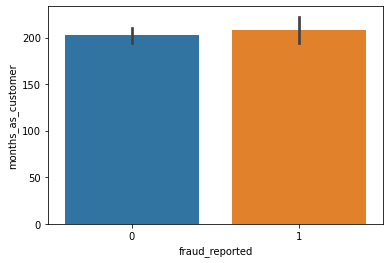

In [217]:
sns.barplot(x=df['fraud_reported'], y=df['months_as_customer'])

<AxesSubplot:xlabel='fraud_reported', ylabel='age'>

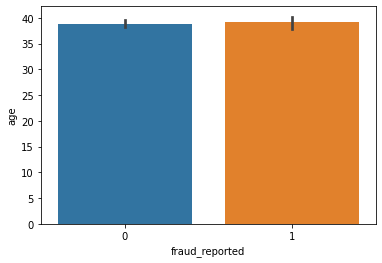

In [218]:
sns.barplot(x=df['fraud_reported'], y=df['age'])

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_bind_date'>

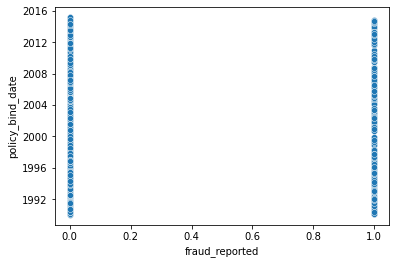

In [219]:
sns.scatterplot(x=df['fraud_reported'], y=df['policy_bind_date'])

<AxesSubplot:xlabel='policy_state', ylabel='fraud_reported'>

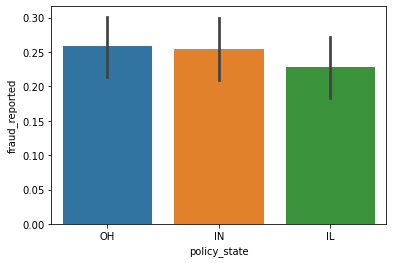

In [220]:
sns.barplot(x=df['policy_state'], y=df['fraud_reported'])

OH and IN seems to have higher number of fraudent reported as compared to IL.

<AxesSubplot:xlabel='policy_csl', ylabel='fraud_reported'>

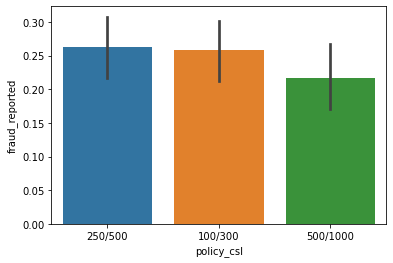

In [221]:
sns.barplot(x=df['policy_csl'], y=df['fraud_reported'])

<AxesSubplot:xlabel='insured_sex', ylabel='fraud_reported'>

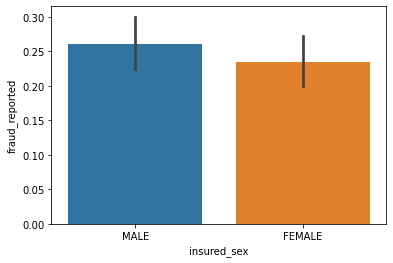

In [222]:
sns.barplot(x=df['insured_sex'], y=df['fraud_reported'])

<AxesSubplot:xlabel='insured_education_level', ylabel='fraud_reported'>

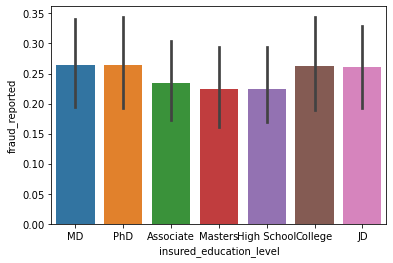

In [223]:
sns.barplot(x=df['insured_education_level'], y=df['fraud_reported'])

<AxesSubplot:xlabel='insured_occupation', ylabel='fraud_reported'>

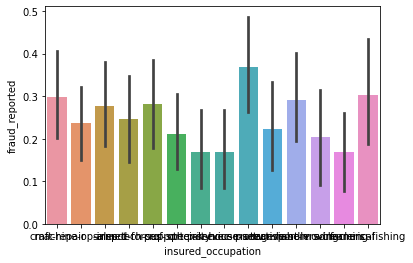

In [224]:
sns.barplot(x=df['insured_occupation'], y=df['fraud_reported'])

<AxesSubplot:xlabel='insured_hobbies', ylabel='fraud_reported'>

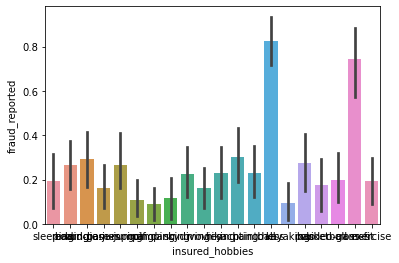

In [225]:
sns.barplot(x=df['insured_hobbies'], y=df['fraud_reported'])

<AxesSubplot:xlabel='insured_relationship', ylabel='fraud_reported'>

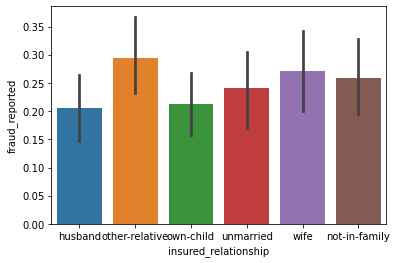

In [226]:
sns.barplot(x=df['insured_relationship'], y=df['fraud_reported'])

<AxesSubplot:xlabel='incident_type', ylabel='fraud_reported'>

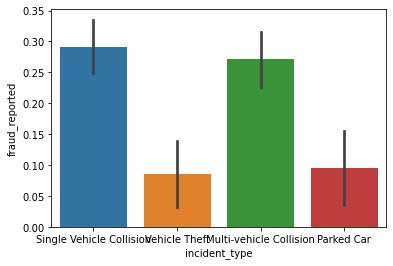

In [227]:
sns.barplot(x=df['incident_type'], y=df['fraud_reported'])

<AxesSubplot:xlabel='collision_type', ylabel='fraud_reported'>

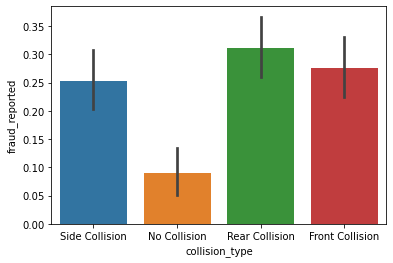

In [228]:
sns.barplot(x=df['collision_type'], y=df['fraud_reported'])

<AxesSubplot:xlabel='incident_severity', ylabel='fraud_reported'>

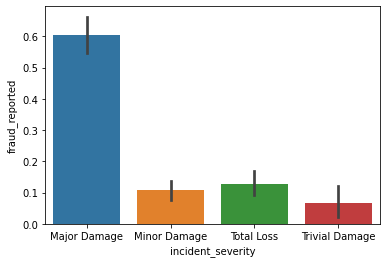

In [229]:
sns.barplot(x=df['incident_severity'], y=df['fraud_reported'])

<AxesSubplot:xlabel='authorities_contacted', ylabel='fraud_reported'>

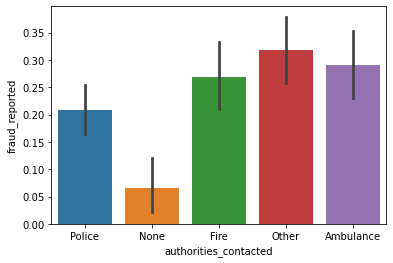

In [230]:
sns.barplot(x=df['authorities_contacted'], y=df['fraud_reported'])

<AxesSubplot:xlabel='incident_state', ylabel='fraud_reported'>

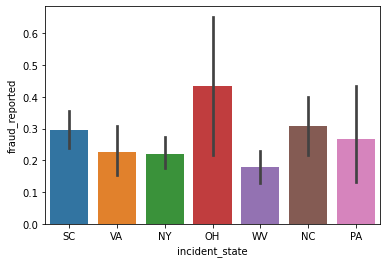

In [231]:
sns.barplot(x=df['incident_state'], y=df['fraud_reported'])

<AxesSubplot:xlabel='incident_city', ylabel='fraud_reported'>

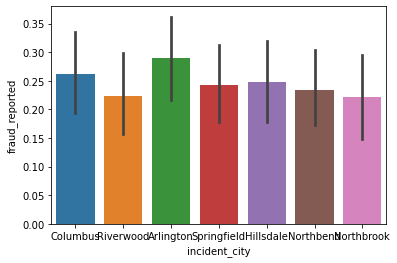

In [232]:
sns.barplot(x=df['incident_city'], y=df['fraud_reported'])

<AxesSubplot:xlabel='property_damage', ylabel='fraud_reported'>

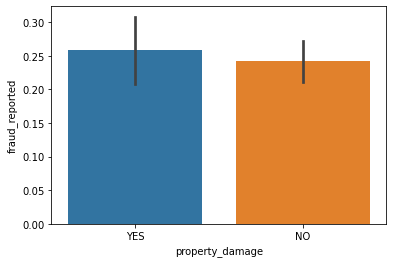

In [233]:
sns.barplot(x=df['property_damage'], y=df['fraud_reported'])

<AxesSubplot:xlabel='police_report_available', ylabel='fraud_reported'>

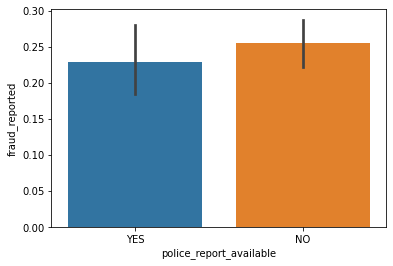

In [234]:
sns.barplot(x=df['police_report_available'], y=df['fraud_reported'])

<AxesSubplot:xlabel='auto_make', ylabel='fraud_reported'>

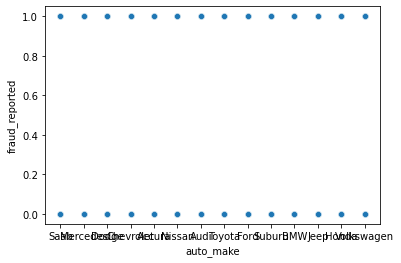

In [235]:
sns.scatterplot(x=df['auto_make'], y=df['fraud_reported'])

<AxesSubplot:xlabel='auto_model', ylabel='fraud_reported'>

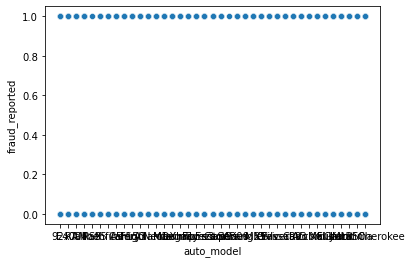

In [236]:
sns.scatterplot(x=df['auto_model'], y=df['fraud_reported'])

Observations:
1) months_as_customer, age, policy_bind_date, incident_city, auto_make, auto_model doesnt seems to have significant relatioship with Fraud_reported.
2) In most of fraud reported cases police report for incident is not available.
3) In most of fraud reported cases property damage is available.

Converting categorical values into numeric values using Label ENcoder

In [237]:
encoding_Le = ["policy_state","policy_csl","insured_sex","insured_education_level","insured_occupation","insured_hobbies","insured_relationship",
               "incident_type","collision_type","incident_severity","authorities_contacted","incident_state","incident_city","property_damage","police_report_available",
              "auto_make","auto_model"]

for cols in encoding_Le:
    df[cols]=le.fit_transform(df[cols])

In [238]:
df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_deductable'>

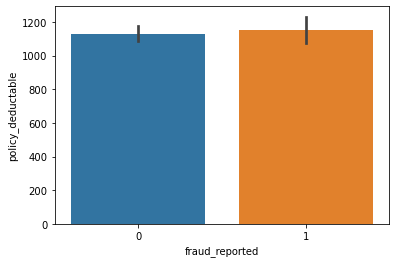

In [239]:
sns.barplot(x=df['fraud_reported'], y=df['policy_deductable'])

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

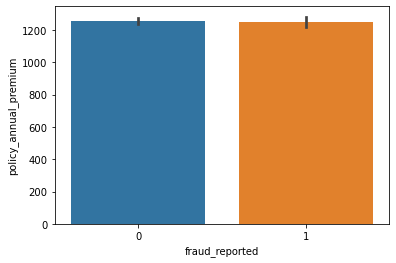

In [240]:
sns.barplot(x=df['fraud_reported'], y=df['policy_annual_premium'])

<AxesSubplot:xlabel='fraud_reported', ylabel='umbrella_limit'>

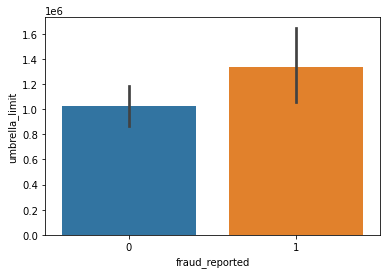

In [241]:
sns.barplot(x=df['fraud_reported'], y=df['umbrella_limit'])

<AxesSubplot:xlabel='fraud_reported', ylabel='insured_zip'>

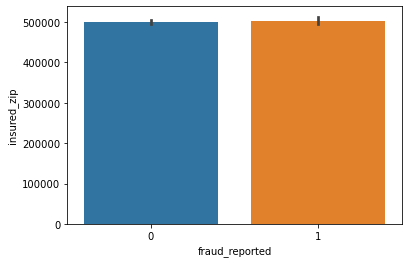

In [242]:
sns.barplot(x=df['fraud_reported'], y=df['insured_zip'])

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-gains'>

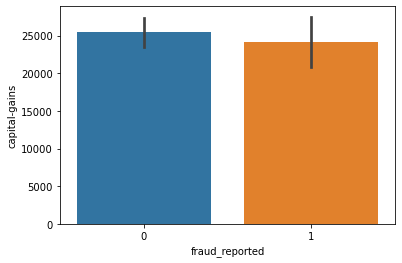

In [243]:
sns.barplot(x=df['fraud_reported'], y=df['capital-gains'])

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-loss'>

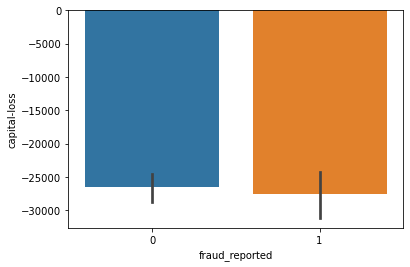

In [244]:
sns.barplot(x=df['fraud_reported'], y=df['capital-loss'])

<AxesSubplot:xlabel='fraud_reported', ylabel='incident_hour_of_the_day'>

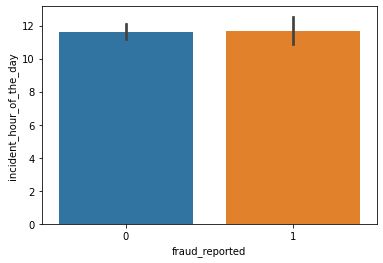

In [245]:
sns.barplot(x=df['fraud_reported'], y=df['incident_hour_of_the_day'])

<AxesSubplot:xlabel='fraud_reported', ylabel='number_of_vehicles_involved'>

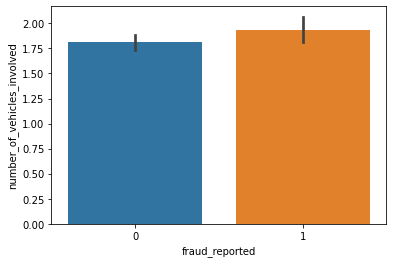

In [246]:
sns.barplot(x=df['fraud_reported'], y=df['number_of_vehicles_involved'])

<AxesSubplot:xlabel='fraud_reported', ylabel='bodily_injuries'>

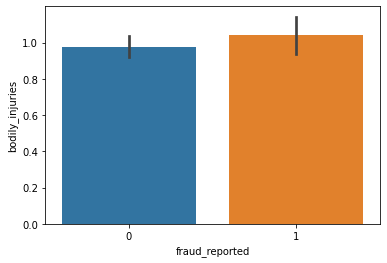

In [247]:
sns.barplot(x=df['fraud_reported'], y=df['bodily_injuries'])

<AxesSubplot:xlabel='fraud_reported', ylabel='witnesses'>

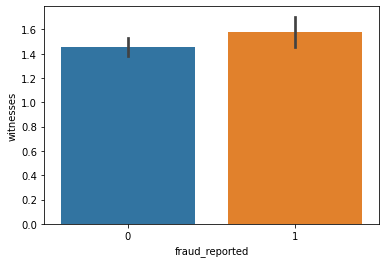

In [248]:
sns.barplot(x=df['fraud_reported'], y=df['witnesses'])

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

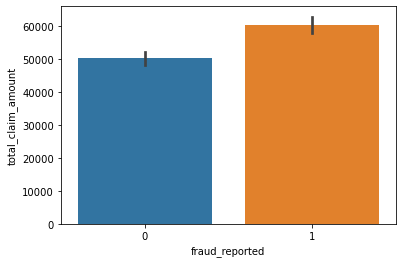

In [249]:
sns.barplot(x=df['fraud_reported'], y=df['total_claim_amount'])

<AxesSubplot:xlabel='fraud_reported', ylabel='injury_claim'>

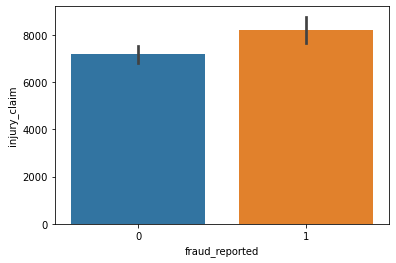

In [250]:
sns.barplot(x=df['fraud_reported'], y=df['injury_claim'])

<AxesSubplot:xlabel='fraud_reported', ylabel='property_claim'>

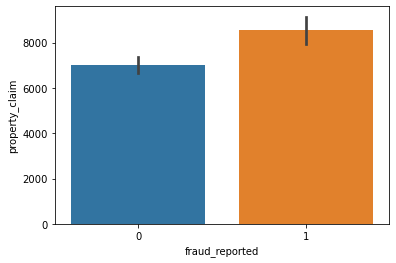

In [251]:
sns.barplot(x=df['fraud_reported'], y=df['property_claim'])

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

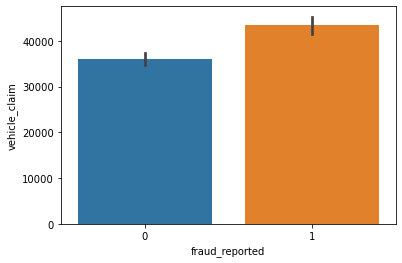

In [252]:
sns.barplot(x=df['fraud_reported'], y=df['vehicle_claim'])

<AxesSubplot:xlabel='fraud_reported', ylabel='auto_year'>

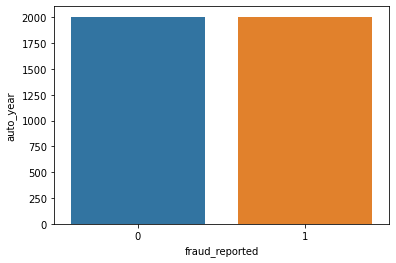

In [253]:
sns.barplot(x=df['fraud_reported'], y=df['auto_year'])

Observations:
1) policy_deductable, policy_annual_premium, insured_zip, incident_hour_of_the_day, auto_year doesnt seem to have significant relationship with target column. 
2) It seems Fraud reported for higher values of umbrella_limit.
3) For higher values for claims seems to be higher chances of fraud getting reported.

In [254]:
df.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,...,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,...,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,...,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,...,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,...,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


Checking Correlation

In [255]:
df.corr()['fraud_reported'].sort_values()

incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
insured_hobbies               -0.046838
authorities_contacted         -0.045802
incident_city                 -0.040403
policy_csl                    -0.037190
police_report_available       -0.027768
auto_make                     -0.027519
capital-gains                 -0.019173
capital-loss                  -0.014863
policy_annual_premium         -0.014480
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
auto_year                      0.007928
insured_education_level        0.008808
age                            0.012143
policy_deductable              0.014817
property_damage                0.017202
insured_zip                    0.019368
months_as_customer             0.020544
insured_relationship           0.021043
policy_state                   0.029432
insured_sex                    0.030873


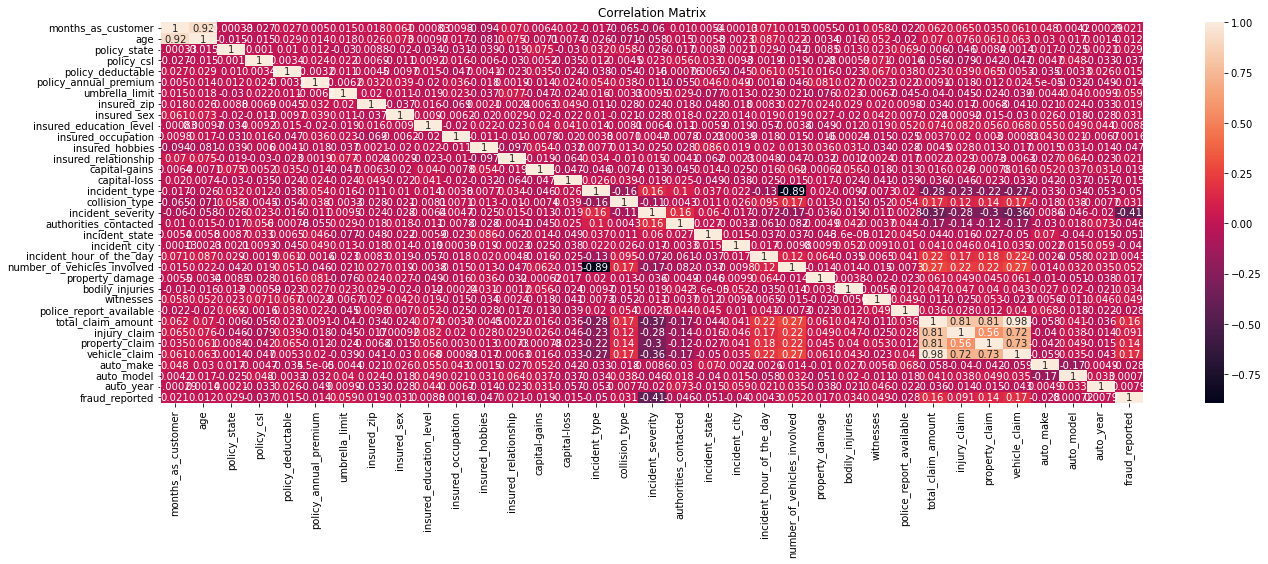

In [256]:
corr_mat = df.corr()
plt.figure(figsize=[22,7])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('Correlation_matrix.jpg')
plt.show()

Observations:
1) auto_model, insured_occupation, incident_hour_of_the_day, auto_year, insured_education_level We can drop these columns as they have very less correlation w.r.t fraud_reported.
2) incident_severity, incident_state, incident_type are highly negatively correlated compared to other features and umbrella_limit, injury_claim, property_claim, total_claim_amount, vehicle_claim are highly positively correlated to fraud_reported as compared to other features.

In [257]:
df.drop(['auto_model','insured_occupation','incident_hour_of_the_day','auto_year','insured_education_level'], axis=1, inplace = True)

In [258]:
df.shape

(1000, 32)

Checking multicollinearity

In [259]:
df.drop(['policy_bind_date','incident_date'],axis=1, inplace=True)

In [260]:
x1 = df.drop(['fraud_reported'],axis=1)
y1 = df['fraud_reported']

In [261]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x1)
X_scaled

array([[ 1.07813958,  0.99083647,  1.18717314, ...,  1.16550497,
         0.74965272,  0.85646614],
       [ 0.2089946 ,  0.33407345, -0.01685641, ..., -1.37269599,
        -1.82334593,  0.36053902],
       [-0.60800168, -1.08891308,  1.18717314, ..., -0.73607206,
        -0.78556451, -0.63131523],
       ...,
       [-0.64276748, -0.54161057,  1.18717314, ...,  0.0208261 ,
         0.77190224,  1.1044297 ],
       [ 2.20802805,  2.52328351, -1.22088596, ..., -0.45197603,
        -0.07357971, -1.37520591],
       [ 2.19064515,  2.3043625 ,  1.18717314, ..., -1.34366428,
        -1.81434017,  0.36053902]])

In [262]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = x1.columns

vif

,vif,Features
0,6.829314,months_as_customer
1,6.826959,age
2,1.029586,policy_state
3,1.020966,policy_csl
4,1.030973,policy_deductable
5,1.031817,policy_annual_premium
6,1.029114,umbrella_limit
7,1.020429,insured_zip
8,1.024304,insured_sex
9,1.044748,insured_hobbies


We will drop injury_claim feature to handle perfect multicollinearity condition. injury_claim feature has less correlation as compared to other three features.

In [263]:
df.drop(['injury_claim'],axis=1,inplace = True)

In [264]:
x2 = df.drop(['fraud_reported'],axis=1)
y2 = df['fraud_reported']

In [265]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x2)
X_scaled

array([[ 1.07813958,  0.99083647,  1.18717314, ...,  1.16550497,
         0.74965272,  0.85646614],
       [ 0.2089946 ,  0.33407345, -0.01685641, ..., -1.37269599,
        -1.82334593,  0.36053902],
       [-0.60800168, -1.08891308,  1.18717314, ..., -0.73607206,
        -0.78556451, -0.63131523],
       ...,
       [-0.64276748, -0.54161057,  1.18717314, ...,  0.0208261 ,
         0.77190224,  1.1044297 ],
       [ 2.20802805,  2.52328351, -1.22088596, ..., -0.45197603,
        -0.07357971, -1.37520591],
       [ 2.19064515,  2.3043625 ,  1.18717314, ..., -1.34366428,
        -1.81434017,  0.36053902]])

In [266]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = x2.columns

vif

,vif,Features
0,6.829314,months_as_customer
1,6.826959,age
2,1.029586,policy_state
3,1.020966,policy_csl
4,1.030973,policy_deductable
5,1.031817,policy_annual_premium
6,1.029114,umbrella_limit
7,1.020429,insured_zip
8,1.024304,insured_sex
9,1.044748,insured_hobbies


As we can see multicollinearity reduced.

Checking skewness

In [267]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.177814
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728
total_claim_amount            -0.594582


In [268]:
columns = ('umbrella_limit','insured_zip','property_damage','police_report_available','total_claim_amount','vehicle_claim')
for col in columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

Checking outliers

months_as_customer                AxesSubplot(0.125,0.816017;0.227941x0.0639831)
age                            AxesSubplot(0.398529,0.816017;0.227941x0.0639831)
policy_state                   AxesSubplot(0.672059,0.816017;0.227941x0.0639831)
policy_csl                        AxesSubplot(0.125,0.739237;0.227941x0.0639831)
policy_deductable              AxesSubplot(0.398529,0.739237;0.227941x0.0639831)
policy_annual_premium          AxesSubplot(0.672059,0.739237;0.227941x0.0639831)
umbrella_limit                    AxesSubplot(0.125,0.662458;0.227941x0.0639831)
insured_zip                    AxesSubplot(0.398529,0.662458;0.227941x0.0639831)
insured_sex                    AxesSubplot(0.672059,0.662458;0.227941x0.0639831)
insured_hobbies                   AxesSubplot(0.125,0.585678;0.227941x0.0639831)
insured_relationship           AxesSubplot(0.398529,0.585678;0.227941x0.0639831)
capital-gains                  AxesSubplot(0.672059,0.585678;0.227941x0.0639831)
capital-loss                

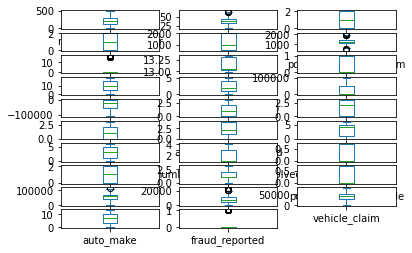

In [269]:
df.plot(kind='box',subplots=True,layout=(10,3))

Balancing Target column - fraud_reported 

In [273]:
from imblearn.over_sampling import SMOTE

In [274]:
smt = SMOTE()
trainx,trainy=smt.fit_resample(x2,y2)

In [275]:
trainx.value_counts()

months_as_customer  age  policy_state  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  insured_sex  insured_hobbies  insured_relationship  capital-gains  capital-loss  incident_type  collision_type  incident_severity  authorities_contacted  incident_state  incident_city  number_of_vehicles_involved  property_damage  bodily_injuries  witnesses  police_report_available  total_claim_amount  property_claim  vehicle_claim  auto_make
0                   32   2             2           1000               1377.040000            0               441363       1            0                5                     61400          -41100        0              2               1                  0                      1               6              4                            0                1                1          0                        39720               6620            26480          0            1
252                 46   1             2           2000      

In [276]:
trainy.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

In [277]:
model = [DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier(),LogisticRegression()]

for i in range(0,50):
    x_train,x_test,y_train,y_test = train_test_split(trainx,trainy,test_size=0.33,random_state=i)
    for models in model:
        models.fit(x_train,y_train)
        prediction = models.predict(x_test)
        accu_Score = accuracy_score(y_test,prediction)
        print("Accuracy score for random state: ", i, " is ",accu_Score)
print()
print()
print()
print()
print()

Accuracy score for random state:  0  is  0.806841046277666
Accuracy score for random state:  0  is  0.5251509054325956
Accuracy score for random state:  0  is  0.8490945674044266
Accuracy score for random state:  0  is  0.6639839034205232
Accuracy score for random state:  0  is  0.5895372233400402
Accuracy score for random state:  1  is  0.8028169014084507
Accuracy score for random state:  1  is  0.5231388329979879
Accuracy score for random state:  1  is  0.8531187122736419
Accuracy score for random state:  1  is  0.676056338028169
Accuracy score for random state:  1  is  0.5714285714285714
Accuracy score for random state:  2  is  0.7947686116700201
Accuracy score for random state:  2  is  0.49899396378269617
Accuracy score for random state:  2  is  0.8873239436619719
Accuracy score for random state:  2  is  0.6901408450704225
Accuracy score for random state:  2  is  0.5814889336016097
Accuracy score for random state:  3  is  0.7887323943661971
Accuracy score for random state:  3  is  

Highest accuracy Score:0.903420523138833 is at random state 8 and for model: RandomForestClassifier.

Parameter Tunning

In [278]:
x1_train,x1_test,y1_train,y1_test = train_test_split(trainx,trainy,test_size=0.33,random_state=8)
rfc = RandomForestClassifier()
parameters={'max_features': ['auto','sqrt','log2']}
gridsearch =GridSearchCV(rfc,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'max_features': 'auto'}

In [279]:
Rfc = RandomForestClassifier(max_features='auto')
Rfc.fit(x_train,y_train)
predictions = Rfc.predict(x_test)
AccScore = accuracy_score(y_test,predictions)
print("Accuracy Score is: ",AccScore)

Accuracy Score is:  0.8712273641851107


In [280]:
score = cross_val_score(Rfc,x1,y1,cv=5)

In [281]:
print("Croos Val Score: ",score)
print("Mean Score: ",score.mean())
print("std Score: ",score.std())

Croos Val Score:  [0.79 0.76 0.75 0.76 0.82]
Mean Score:  0.7759999999999999
std Score:  0.025768197453450235


0.8711782614328281

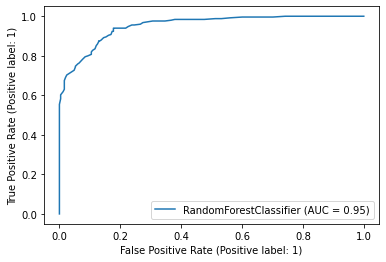

In [282]:
from sklearn import metrics
metrics.plot_roc_curve(Rfc, x_test, y_test)
metrics.roc_auc_score(y_test, predictions, average=None)